# Homework 1

### Q1

step1: 先讀取資料，再標準化所有feature values，觀察訓練與測試資料的大小。  
step2: 完成myknn_regressor的class：暴力法的演算法是先算出每筆測試資料與各個訓練資料的距離，然後找出距離最近的k個鄰居，再依照不同類型算出Y_train的平均值。  
step3: 計算實際值與預測值的RMSE。

In [110]:
import pickle
from sklearn import preprocessing
import numpy as np

In [363]:
# Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

doscaling = 1

if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    #standardize feature values
    X_train = xscaler.transform(msd_data['X_train'])
    X_test = xscaler.transform(msd_data['X_test'])
else:
    X_train = msd_data['X_train']
    X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

In [112]:
# size of data
print(f'train_size: {X_train.shape[0]}')
print(f'test_size: {X_test.shape[0]}')

train_size: 5000
test_size: 3000


In [113]:
msd_data['X_test']

array([[  38.51784,   55.38723,   10.31652, ...,    6.66624,  -73.75585,
           9.47857],
       [  44.7309 ,   46.25776,    8.55636, ...,    4.5564 ,   53.49956,
           5.39116],
       [  43.08912,   45.70197,   17.18467, ...,  -13.64909,   -7.42137,
          -4.97266],
       ...,
       [  39.81814,   62.12221,    6.60567, ...,   28.27807,  -60.00203,
         -11.19226],
       [  50.25968,   43.10325,   24.72866, ...,    2.71602,  -44.27226,
          -2.54583],
       [  41.39744,   -8.88692,  -20.15887, ...,    8.63798, -120.34024,
           3.65709]])

### Q1.1

In [372]:
class myknn_regressor():
    def __init__(self, n_neighbors = 10, mean_type = "equal_weight"):
        """mean_type can be equal_weight or remove_outliers.
                              equal_weight use the same weight for all neighbors.
                              remove_outliers remove neighbors out in [Q1 - 1.5 IQR, Q3 + 1.5IQR]."""
        ### Add your code here ###  
        '''save parameters'''   
        self.n_neighbors = n_neighbors 
        self.mean_type = mean_type

    def fit(self, x_train, y_train):
        ### Add your code here ###
        '''save training data'''
        self.x_train = x_train
        self.y_train = y_train
         

    def predict(self, x_test):
        """use remove_outliers only if k>=10"""
         ### Add your code here ###
        if self.n_neighbors < 10:
            self.mean_type = "equal_weight"
        
        self.x_test = x_test
        n_train = self.x_train.shape[0]
        n_test = self.x_test.shape[0]
        y_pred = []
        
        for i in range(n_test): # for every x_test
            dist = []
            for j in range(n_train): # for every x_train
                # Euclidean distance between x_test's ith row and x_train's jth row
                d = np.linalg.norm(self.x_test[i,:] - self.x_train[j,:])
                dist.append([d, self.y_train[j]])
            
            sort_dist = sorted(dist, key = lambda l: l[0]) # sort y_train by distance in ascending order


            # k nearest neighbors' y_train
            k_neighbors = []
            for k in range(self.n_neighbors):
                k_neighbors.append(sort_dist[k][1]) 

            
            if self.mean_type == "equal_weight":
                y_pred.append(np.mean(k_neighbors))
            else: # remove_outliers
                q1 = np.quantile(k_neighbors,0.25) 
                q3 = np.quantile(k_neighbors,0.75)
                iqr = q3 - q1
                
                new_neighbors = []
                for k in range(len(k_neighbors)):
                    y = k_neighbors[k]
                    if y >= (q1 - (1.5 * iqr)) and y <= (q3 + (1.5 * iqr)):
                        new_neighbors.append(y)

                y_pred.append(np.mean(new_neighbors))

        return np.array(y_pred)

### Q1.2

In [373]:
# use myknn_regressor
myknn = myknn_regressor(20, "equal_weight")
myknn.fit(X_train, Y_train)
ypred = myknn.predict(X_test)

In [374]:
# count RMSE
actual = Y_test
predicted = ypred
square = np.square(np.subtract(actual, predicted))
MSE = square.mean()
RMSE = np.sqrt(MSE)

print(f'RMSE: {RMSE}')

RMSE: 10.25126451549596


In [375]:
# print first 20 predictions
print("Q1.2 | first 20 predictions:")
for i in ypred[:20]:
    print(i)

Q1.2 | first 20 predictions:
1993.35
1993.8
2000.65
1991.5
1992.8
1998.5
1988.1
1991.65
2002.25
2003.0
2000.5
1998.65
1995.55
1997.2
1995.05
1997.4
1992.15
2000.45
2003.2
1995.75


### Q1.3

In [376]:
# use myknn_regressor
myknn = myknn_regressor(20, "remove_outliers")
myknn.fit(X_train, Y_train)
ypred = myknn.predict(X_test)

In [377]:
# count RMSE
actual = Y_test
predicted = ypred
square = np.square(np.subtract(actual, predicted))
MSE = square.mean()
RMSE = np.sqrt(MSE)

print(f'RMSE: {RMSE}')

RMSE: 10.212572466080376


In [378]:
# print first 20 predictions
print("Q1.3 | first 20 predictions:")
for i in ypred[:20]:
    print(i)

Q1.3 | first 20 predictions:
1993.35
1993.8
2000.65
1992.7368421052631
1992.8
2000.0
1988.1
1991.65
2002.25
2003.9473684210527
2000.5
2000.9444444444443
1995.55
1997.2
1998.611111111111
1997.4
1992.15
2003.8333333333333
2003.2
1995.75


### Q2

In [346]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
klist = [1 , 2 , 3 , 4 , 5 , 10 , 15 , 20 , 25 , 30 , 35 , 40 , 45 , 50 , 55 , 60 , 80 , 100 , 120 , 140 , 160 , 180 , 200]

##### setting1

In [379]:
# feature scaling
doscaling = 1

if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    #standardize feature values
    X_train = xscaler.transform(msd_data['X_train'])
    X_test = xscaler.transform(msd_data['X_test'])
else:
    X_train = msd_data['X_train']
    X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

In [380]:
rmse_list1 = []

for k in klist:
    knn1 = KNeighborsRegressor(n_neighbors = k)
    knn1.fit(X_train, Y_train)
    ypred1 = knn1.predict(X_test)
    
    square1 = np.square(np.subtract(Y_test, ypred1))
    mse1 = square1.mean()
    rmse1 = np.sqrt(mse1)
    rmse_list1.append(rmse1)

##### setting2

In [381]:
# No feature scaling
doscaling = 0

if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    #standardize feature values
    X_train = xscaler.transform(msd_data['X_train'])
    X_test = xscaler.transform(msd_data['X_test'])
else:
    X_train = msd_data['X_train']
    X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

In [382]:
rmse_list2 = []

for k in klist:
    knn2 = KNeighborsRegressor(n_neighbors = k)
    knn2.fit(X_train, Y_train)
    ypred2 = knn2.predict(X_test)
    
    square2 = np.square(np.subtract(Y_test, ypred2))
    mse2 = square2.mean()
    rmse2 = np.sqrt(mse2)
    rmse_list2.append(rmse2)

##### setting3

In [369]:
# feature scaling
doscaling = 1

if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    #standardize feature values
    X_train = xscaler.transform(msd_data['X_train'])
    X_test = xscaler.transform(msd_data['X_test'])
else:
    X_train = msd_data['X_train']
    X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

In [128]:
rmse_list3 = []

for k in klist:
    knn3 = myknn_regressor(k, "remove_outliers")
    knn3.fit(X_train, Y_train)
    ypred3 = np.array(knn3.predict(X_test))
    
    square3 = np.square(np.subtract(Y_test, ypred3))
    mse3 = square3.mean()
    rmse3 = np.sqrt(mse3)
    rmse_list3.append(rmse3)

In [370]:
rmse_list3

[13.911074724837043,
 12.068170946750795,
 11.389120864846157,
 11.1123354880961,
 10.894692897614565,
 10.468549209697088,
 10.293424167991525,
 10.212572466080376,
 10.19147537897133,
 10.132105705172414,
 10.109608004792985,
 10.093231539122922,
 10.080018891479627,
 10.08078333324933,
 10.059767600751963,
 10.073857809066583,
 10.063683549276588,
 10.064917276737452,
 10.067237203620246,
 10.090646192390137,
 10.115316675702928,
 10.124987056716318,
 10.146220720227745]

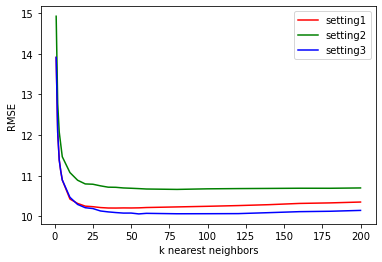

In [383]:
# draw the error curve
plt.plot(klist, rmse_list1, color='red', label='setting1')
plt.plot(klist, rmse_list2, color='green', label='setting2')
plt.plot(klist, rmse_list3, color='blue', label='setting3')
plt.xlabel('k nearest neighbors') # title of x-axis
plt.ylabel('RMSE') # tile of y-axis
plt.legend()
plt.show()

##### Observations

1. setting1 vs setting2:  
同樣是使用sklearn套件訓練出的模型，setting1不論k為多少，表現都比setting1還好，整體而言可發現特徵標準化對模型表現的改善。  
2. setting1 vs setting3:
這兩組設定的共同點都是有經過特徵標準化，很明顯地，暴力法的myknn表現遠比sklearn套件預設的方法更好。但暴力法的缺點就是時間複雜度較大，訓練、測試模型需要不少時間。若資料更多，模型ㄧ定會跑非常慢，暴力法可能就不太適合。
3. setting3:
從藍線可觀察出RMSE會隨k遞減，k=25之後就是趨近水平的曲線。直接觀察setting3得到的所有RMSE值就能得知55是最適k值。


### Q3

In [384]:
import pickle
from sklearn import preprocessing
import numpy as np
np.set_printoptions(suppress=True)

#Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
#standardize feature values
X_train_sd = xscaler.transform(msd_data['X_train'])
X_test_sd = xscaler.transform(msd_data['X_test'])

#outcome values
Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

### Q3.1

![Image](./Q3-1.png)

### Q3.2

In [424]:
from copy import deepcopy
import numpy as np

class mylasso():
    def __init__(self, lamcoef = 0.1, max_iter=1000, tol=1e-6, const_regu = False):
        """lamcoef: the regularization coefficient
           max_iter: maximum number of iteration for model training
           tol: tolerance for the stopping criteria for model training
           const_regu: whether the constant term should be regularized, default to False
           """
        ### Add your code here ###
        self.lamcoef = lamcoef
        self.max_iter = max_iter
        self.tol = tol
        self.const_regu = const_regu

    def fit(self, x_train, y_train, winit = "ridge", keep_traindata = True, verbose = False):
        """Fit a Lasso model
           x_train: a numpy matrix that contains training features
           y_train: a numpy matrix that contains the label
           winit: how weights are initialized, default to "ridge", ridge regression
           keep_traindata: whether the object is going to keep training data after the training process completed
           verbose: output a lot of message"""
        ### Add your code here ###
        if keep_traindata: # save training data
            self.x_train = deepcopy(x_train)
            self.y_train = deepcopy(y_train)

        def soft_threshold(a1, a2):
            if a1 - a2 > 0:
                return a1 - a2
            elif a1 + a2 < 0:
                return a1 + a2
            else:
                return 0
        
        
        x_train = np.column_stack((np.ones(len(x_train)), x_train)) # add one column (x[:,0])
        
        # Initialize W: L2 regularization
        '''W = ((X^T)X)+lambda*I)^(-1)(X^T)Y'''
        if winit == "ridge":
            identity = np.identity(x_train.shape[1])
            X_T = np.transpose(x_train)
            a = np.linalg.inv(np.dot(X_T, x_train) + self.lamcoef * identity)
            b = np.dot(a, X_T)
            W = np.dot(b, y_train)
        else:
            W = np.zeros(x_train.shape[1]) # row vector
            # W[0] = np.sum(y_train - np.dot(x_train[:, 1:], W[1:])) / (x_train.shape[0])
        
        L = 0.0
        min_L = 1e+20
        min_W = deepcopy(W)
        for t in range(self.max_iter): 
            lastL = L
            for j in range(1, len(W)):
                tmp_W = deepcopy(W)
                tmp_W[j] = 0.0
                r_j = y_train - np.dot(x_train, tmp_W) #residual
                arg1 = np.dot(x_train[:, j], r_j) / (x_train[:, j]**2).sum()
                arg2 = (self.lamcoef * (x_train.shape[0])) / (x_train[:, j]**2).sum()
                W[j] = soft_threshold(arg1, arg2) # coordinate descent with soft thresholding
                W[0] = np.sum(y_train - np.dot(x_train[:, 1:], W[1:])) / (x_train.shape[0])

            L = 0.0
            for i in range(x_train.shape[0]):
                L += (y_train[i] - np.dot(x_train[i, 1:], W[1:]) - W[0])**2
            L = L / (2 * x_train.shape[0]) 
            # L = (((y_train - np.dot(x_train[:, 1:], W[1:]) - W[0])**2).sum()) / (2 * x_train.shape[0]) 
            if self.const_regu: # L'
                L += self.lamcoef * ((abs(W[1:]).sum()) + abs(W[0]))
            else: # L
                L += self.lamcoef * ((abs(W[1:]).sum()))

            if L < min_L:
                min_L = L
                min_W = deepcopy(W)

            if abs(L - lastL) < self.tol:
                break

        self.loss = min_L
        self.intercept = min_W[0]
        self.coef = min_W[1:]

        return self

        
    def predict(self, x_test):
        """Make prediction using trained model"""
        ### Add your code here ###
        y_pred = np.dot(x_test, self.coef)
        y_pred += self.intercept * np.ones(len(y_pred))
        return y_pred

### Q3.3

In [425]:
x_train = X_train_sd
y_train = Y_train
x_test = X_test_sd
y_test = Y_test

In [426]:
mlo = mylasso(lamcoef = 0.1)
mlo.fit(x_train, y_train)
ypred = mlo.predict(x_test)

In [427]:
# count training RMSE and MAE
yhead = np.dot(x_train, np.transpose(mlo.coef)) + mlo.intercept
train_square = np.square(np.subtract(y_train, yhead))
train_MSE = train_square.mean()
train_RMSE = np.sqrt(train_MSE)

train_subtr = abs(np.subtract(y_train, yhead))
train_MAE = train_subtr.mean()

# count number of nonzero weights
num = 0
for i in mlo.coef:
    if i != 0.0:
        num += 1

print(f'Traing loss: {mlo.loss}')
print(f'Training RMSE: {train_RMSE}')
print(f'Training MAE: {train_MAE}')
print(f'Intercept: {mlo.intercept}')
print(f'Feature Weights:\n{mlo.coef}')
print(f'number of nonzero weights: {num}')

Traing loss: 49.88840410995357
Training RMSE: 9.719499089084623
Training MAE: 6.980898009625429
Intercept: 1998.266
Feature Weights:
[ 4.6518551  -2.45673153 -1.06195885  0.         -0.34275054 -2.94854329
  0.         -0.39970268 -0.42653866  0.         -0.23498651 -0.39491058
  0.50307719  0.         -0.34207893  0.61674589  0.15722753  0.43489925
  0.43595375  1.12941661  0.40663481  0.          1.77743607  0.
 -0.16842728  0.07833529  0.66391172  0.01297938  0.15350723  0.
 -0.21762074 -0.22189107  0.         -0.0027548  -0.01707674 -0.2599464
  0.          0.28969362  0.34893387  0.         -0.26112569 -0.14488702
 -0.00995271  0.03497723 -0.03984338  0.          0.00299383 -0.17804306
  0.          0.06494382  0.27076506  0.          0.          0.
  0.          0.         -0.63813223  0.23761428 -0.19016387  0.
 -0.18875525  0.         -0.13590668  0.0612754  -0.26619017  0.
  0.          0.         -0.03099184  0.         -0.19276517  0.01221358
  0.20735199  0.25118247  0.1231

### Q3.4

In [428]:
# first 5 predictions
print("Q3,4 | First 5 predictions:")
for i in ypred[:5]:
    print(i)

Q3,4 | First 5 predictions:
1991.9319114535242
1999.07198636559
2001.7629360219687
1991.3031702908415
1994.4265793347954


In [429]:
# count testing RMSE and MAE
test_square = np.square(np.subtract(y_test, ypred))
test_MSE = test_square.mean()
test_RMSE = np.sqrt(test_MSE)

test_subtr = abs(np.subtract(y_test, ypred))
test_MAE = test_subtr.mean()

print(f'Test RMSE: {test_RMSE}')
print(f'Test MAE: {test_MAE}')

Test RMSE: 9.648414790970719
Test MAE: 6.921385961496761


### Q3.5

In [430]:
lam_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2]
loss_list, nonzero_list, avgweight_list, trainRMSE_list,  testRMSE_list = [], [], [], [], []

for l in lam_list:
    # train and test model
    mlo2 = mylasso(lamcoef = l)
    mlo2.fit(x_train, y_train)
    ypred2 = mlo2.predict(x_test)

    loss_list.append(mlo2.loss)
    # count number of nonzero weights
    num2 = 0
    for i in mlo2.coef:
        if i != 0.0:
            num2 += 1

    nonzero_list.append(num2)
    
    avgw = abs(mlo2.coef).mean()
    avgweight_list.append(avgw)

    # count training RMSE
    yhead2 = np.dot(x_train, np.transpose(mlo2.coef)) + mlo2.intercept
    train_square = np.square(np.subtract(y_train, yhead2))
    train_MSE = train_square.mean()
    train_RMSE = np.sqrt(train_MSE)
    trainRMSE_list.append(train_RMSE)

    # count testing RMSE
    test_square = np.square(np.subtract(y_test, ypred2))
    test_MSE = test_square.mean()
    test_RMSE = np.sqrt(test_MSE)
    testRMSE_list.append(test_RMSE)

In [431]:
# Training loss
print('Training loss:')
print(loss_list)

Training loss:
[46.570460820946074, 46.58737881672582, 46.60846049996794, 46.774656529614944, 46.976825680404076, 48.417389889743816, 49.88840410995357, 56.37568820327452, 59.88932371917652, 61.492131277099055]


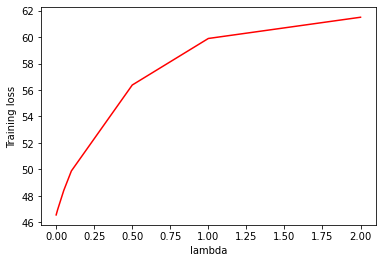

In [432]:
plt.plot(lam_list, loss_list, color='red')
plt.xlabel('lambda') # title of x-axis
plt.ylabel('Training loss') # tile of y-axis
plt.show()

In [433]:
# number of nonzero weights
print('Number of nonzero weights:')
print(nonzero_list)

Number of nonzero weights:
[90, 90, 90, 89, 87, 76, 59, 16, 4, 1]


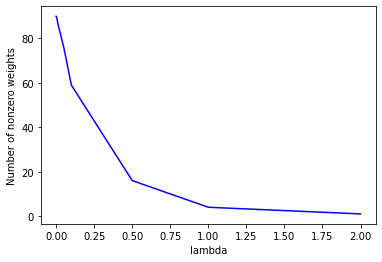

In [434]:
plt.plot(lam_list, nonzero_list, color='blue')
plt.xlabel('lambda') # title of x-axis
plt.ylabel('Number of nonzero weights') # tile of y-axis
plt.show()

In [435]:
print('Average Weight Size (Mean of Absolute Weight):')
print(avgweight_list)

Average Weight Size (Mean of Absolute Weight):
[0.47060619871421905, 0.4695070155670859, 0.46790556806954486, 0.45575371989789715, 0.44290332292655366, 0.363977110302075, 0.2948969820661327, 0.12003118917964041, 0.04217496765973302, 0.004265587910527306]


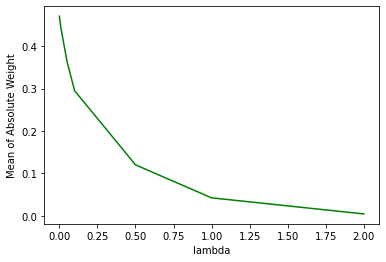

In [436]:
plt.plot(lam_list, avgweight_list, color='green')
plt.xlabel('lambda') # title of x-axis
plt.ylabel('Mean of Absolute Weight') # tile of y-axis
plt.show()

In [437]:
# RMSE
print('Taining RMSE:')
print(trainRMSE_list)
print('\nTest RMSE:')
print(testRMSE_list)

Taining RMSE:
[9.650515568109066, 9.65051822453337, 9.650528379196828, 9.650861863653516, 9.651757631620281, 9.67258940443401, 9.719499089084623, 10.096958422236945, 10.591843713896127, 11.02037435418636]

Test RMSE:
[9.644362816150892, 9.644091526385356, 9.643538551386593, 9.64006352759448, 9.636407817376979, 9.62643356884905, 9.648414790970719, 9.999130618162077, 10.474620633931151, 10.902614277773955]


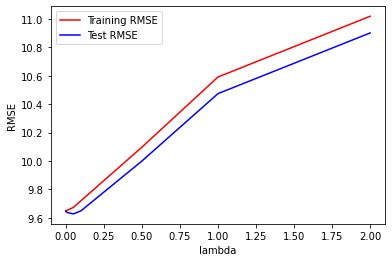

In [438]:
plt.plot(lam_list, trainRMSE_list, color='red', label='Training RMSE')
plt.plot(lam_list, testRMSE_list, color='blue', label='Test RMSE')
plt.xlabel('lambda') # title of x-axis
plt.ylabel('RMSE') # tile of y-axis
plt.legend()
plt.show()

##### Observations
1. Traing loss跟RMSE都會隨係數lambda遞增，而Number of Nonzero Weights、Average Weight Size (Mean of Absolute Weight)則會隨lambda遞減。
2. Test RMSE不論lambda為何都比Trainng RMSE還要小，所以模型應該沒有出現overfitting的狀況。